# Searching Algorithms Continuous Assessment 2


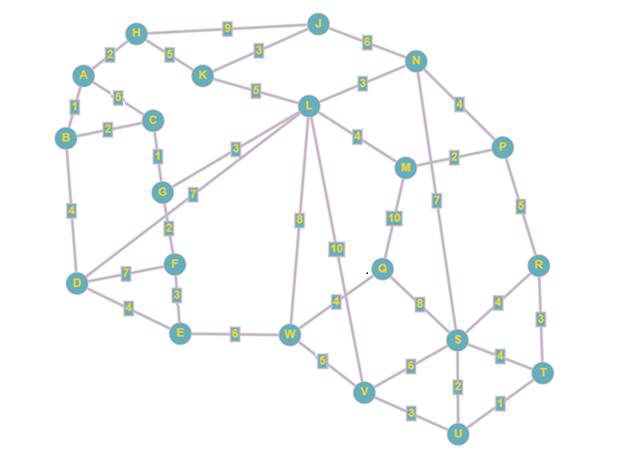

### Tasks 
1. 
    1. Identify the differences between a graph and a tree. [0-5]
    2. Explain in detail how the graph is an abstraction of the problem. [0-5]
    3.Identify the advantages of using a visualisation such as the one shown in Fig. 1. [0-5]
<br>
<br>
2. Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. [0-25]
<br>
<br>
3. The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed. [0-60]
    <br>
    1.Understand the Problem: Understand the problem and the requirements. Make sure you know how Dijkstra’s algorithm and the A* search algorithm work, and how they use heuristics to find the shortest path.

    2.Implement Dijkstra’s Algorithm: Write a program that implements Dijkstra’s algorithm to solve the problem. Make sure to test your program to ensure it’s working correctly.

    3.Implement A Search Algorithm*: Write a program that implements the A* search algorithm to solve the problem. Again, make sure to test your program to ensure it’s working correctly.

    4.Compare the Solutions: Compare the solutions generated by both algorithms. Look at the paths they found, the number of nodes they explored, and any other relevant metrics.

    5.Analyze the Complexity: Analyze the time and space complexity of both algorithms. This will give you an idea of how they will perform on larger inputs.

    6.Measure the Processing Time: Measure the actual time it takes for the solutions to be processed. You can do this by recording the time before and after running each algorithm, and then subtracting the start time from the end time.

    7.Write a Report: Write a report in Mark-down that presents your findings. Include your code, an explanation of how each algorithm works, a comparison of their performance, and any other relevant information. 

### Task 1.a  Identify the differences between a graph and a tree

Graph and Trees are Both types of Non-linear data structures used to visualise relationships between objects.

#### Graph: 
Graph is Collection of finite, non-empty sets of Nodes(Vertices/V) and Edges(Lines/E). 
1. Edges are connecting these Nodes. 
2. Can have multiple edges between 2 Nodes
3. It can be directed and undirected, can have cycles( path that starts and ends at the same node).
4. Doesn't have a root node and parent-child hierarchy 
5. Generally more complex than Trees, since it has cycles, loops, mulltiple paths between 2 nodes and etc.

#### Tree:
Tree is a special type of graph. If in graph we had just a bunch of nodes connected with each other, here we have a hierarchical data structure that consists of root Node that is connected to the rest of the nodes by edges forming parent-child relationships or hieararchy.
1. Has Root Node(It doesn' have a parent node) 
2. It is minimally connected graph, since it has only one path between two Nodes
3. Doesn't have loops, circuits or self-loops
4. Every node in the tree(except the root) is connected by an edge to exactly one other node.(that node is called the parent, and node that are connected to it is called - child)
5. Since it has parent-child relationship, the flow can be there with direction from top-bottom or bottom-top.
6. Parent node can have any number of child nodes.
<br>
<br>
To conclude, we can say that Trees are more limited and structured form of graphs.

### Task 1.b

### Task 3 Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically

1. I am going to create a Graph class for the tasks above.  <br>
It is not adding any functionality or logic for the Dijkstra's algorithm, but it makes code more readable, extensible and concise

In [100]:
# init_graph = {} dict
# nodes = [] list 

class Graph:
    def __init__(self, nodes, directed=True):
        self.m_num_of_nodes = len(nodes)
        self.m_nodes = nodes

        # Define the type of a graph
        self.m_directed = directed

        # Initialize adjacency list with a dictionary for each node
        self.m_adj_list = {node: {} for node in self.m_nodes}      

    def add_edge(self, node1, node2, weight=1):
        self.m_adj_list[node1][node2] = weight
        
        if not self.m_directed:
            self.m_adj_list[node2][node1] = weight
    
    #Returns the nodes of the graph
    def get_nodes(self):
        return self.m_nodes
    
    def print_adj_list(self):
        for key in self.m_adj_list.keys():
            print("node", key, ": ", self.m_adj_list[key])


In [101]:
nodes = ['A','B','C','D','E','F','G','H','J','K',
         'L','M','N','P','Q','R','S','T','U','V','W']

# Create a graph with 23 nodes (from 'A' to 'W')
graph = Graph(nodes, directed=False)

# Create a dictionary to map node labels to node indices
#node_indices = {char: index for index, char in enumerate('ABCDEFGHIJKLMNOPQRSTUVW')}

# Add edges to the graph
# Add edges between the nodes
graph.add_edge('A', 'B', 1)
graph.add_edge('A', 'C', 5)
graph.add_edge('A', 'H', 2)
graph.add_edge('B', 'C', 2)
graph.add_edge('B', 'D', 4)
graph.add_edge('C', 'G', 1)
graph.add_edge('D', 'E', 4)
graph.add_edge('D', 'F', 7)
graph.add_edge('D', 'L', 7)
graph.add_edge('E', 'W', 6)
graph.add_edge('E', 'F', 3)
graph.add_edge('F', 'G', 2)
graph.add_edge('G', 'L', 3)
graph.add_edge('H', 'J', 9)
graph.add_edge('H', 'K', 5)
graph.add_edge('J', 'K', 3)
graph.add_edge('J', 'N', 6)
graph.add_edge('K', 'L', 5)
graph.add_edge('L', 'N', 3)
graph.add_edge('L', 'M', 4)
graph.add_edge('L', 'V', 10)
graph.add_edge('L', 'W', 8)
graph.add_edge('M', 'P', 2)
graph.add_edge('M', 'Q', 10)
graph.add_edge('N', 'P', 4)
graph.add_edge('N', 'S', 7)
graph.add_edge('P', 'R', 5)
graph.add_edge('Q', 'S', 8)
graph.add_edge('Q', 'W', 4)
graph.add_edge('R', 'S', 4)
graph.add_edge('R', 'T', 3)
graph.add_edge('S', 'T', 4)
graph.add_edge('S', 'U', 2)
graph.add_edge('S', 'V', 6)
graph.add_edge('T', 'U', 1)
graph.add_edge('U', 'V', 3)
graph.add_edge('V', 'W', 5)



In [102]:
graph.print_adj_list()

node A :  {'B': 1, 'C': 5, 'H': 2}
node B :  {'A': 1, 'C': 2, 'D': 4}
node C :  {'A': 5, 'B': 2, 'G': 1}
node D :  {'B': 4, 'E': 4, 'F': 7, 'L': 7}
node E :  {'D': 4, 'W': 6, 'F': 3}
node F :  {'D': 7, 'E': 3, 'G': 2}
node G :  {'C': 1, 'F': 2, 'L': 3}
node H :  {'A': 2, 'J': 9, 'K': 5}
node J :  {'H': 9, 'K': 3, 'N': 6}
node K :  {'H': 5, 'J': 3, 'L': 5}
node L :  {'D': 7, 'G': 3, 'K': 5, 'N': 3, 'M': 4, 'V': 10, 'W': 8}
node M :  {'L': 4, 'P': 2, 'Q': 10}
node N :  {'J': 6, 'L': 3, 'P': 4, 'S': 7}
node P :  {'M': 2, 'N': 4, 'R': 5}
node Q :  {'M': 10, 'S': 8, 'W': 4}
node R :  {'P': 5, 'S': 4, 'T': 3}
node S :  {'N': 7, 'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6}
node T :  {'R': 3, 'S': 4, 'U': 1}
node U :  {'S': 2, 'T': 1, 'V': 3}
node V :  {'L': 10, 'S': 6, 'U': 3, 'W': 5}
node W :  {'E': 6, 'L': 8, 'Q': 4, 'V': 5}


### Next we implement Dijkstra's algorithm. Let's start with the definition of a function.

#### Basics of the Algorithm 
 Every edge is assigned with a travel time, algorithm uses it to find a path from point A to B in the shortest possible time. 
<br>
##### 4 Basic steps of Dijkstra's algorithm 
1. Starts from the source node and it analyzes the graph to find the shortest(cheapest) path between source node and all other nodes.
2. Keeps track of the current shortest distance from each node to the starting point and updates it, in case if it finds a shorter way
3. After finding the shortest path between two nodes(source & other node), the other node is added to the path and marked as visited
4. The process is keep going on until all the nodes have been visited. 

In [110]:
import heapq

def calculate_distances(graph, starting_vertex, end_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0
    
    #added a previous_vertices dictionary 
    #to keep track of the path that leads to each vertex
    previous_vertices = {vertex: None for vertex in graph}

    queue = [(0, starting_vertex)]
    while len(queue) > 0:
        # Pop a vertex with the smallest distance from the queue
        current_distance, current_vertex = heapq.heappop(queue)

        # If we've reached the end_vertex, we can exit early
        if current_vertex == end_vertex:
            path = []
            while current_vertex is not None:
                path.append(current_vertex)
                current_vertex = previous_vertices[current_vertex]
            return distances[end_vertex], path[::-1]

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_vertices[neighbor] = current_vertex
                heapq.heappush(queue, (distance, neighbor))

    return distances


In [111]:
print(calculate_distances(graph.m_adj_list, 'A', 'S'))

(17, ['A', 'B', 'C', 'G', 'L', 'N', 'S'])


In [112]:
print(graph.get_nodes())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W']
